# Pipeline, Transformer, Grid Search

## Importation des modules

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Chargement du dataset

In [159]:
data = pd.read_csv("../../datasets/salary.csv")

In [221]:
data.shape

(32561, 15)

## Séparation du Target des autres données

In [161]:
data["salary"].replace([' <=50K',' >50K'], [0,1], inplace=True)
y = data["salary"]

In [162]:
# Obtention des données d'entré non prétraité
df = data.drop(['salary','native-country'], axis=1)

In [166]:
# Récuperation des differentes valeurs unique de nos données categorielle
cat_list = list()
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for column in cat_names:
    for val in df[column].unique():
        cat_list.append(val)
len(cat_list)

60

## Encodage de nos données catégorielles

In [167]:
one_hot = OneHotEncoder()
data_enc = one_hot.fit_transform(df[cat_names])

## Obtention de nos données d'entrée prétraité

In [168]:
df_cat = pd.DataFrame(data_enc.toarray(), columns=cat_list)
df_cat.drop(' ?', axis=1, inplace=True)

In [169]:
df_num = df.drop(cat_names, axis=1)

In [189]:
df_x = pd.concat([df_num, df_cat], axis=1)
df_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,State-gov,Self-emp-not-inc,Private,Federal-gov,...,Own-child,Unmarried,Other-relative,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Male,Female
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Subdivision de nos données

In [175]:
# subdivision de nos données en données d'entrainement et de test
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=4)

## Sélection de modèle: GridSearchCV

In [176]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean', 'manhattan']} # dictionnaire de nos hyper paramètre avec leurs plages de valeur pour la selection
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5) # implementation de la classe GridSearchCV

In [177]:
# Entrainement de GridSearchCV sur nos données d'entrainement 
# GridSearchCV va chercher la meilleur combinaison possible en fonction des plages de valeur qu'on lui a fournie
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [179]:
# les paramètre obtimaux pour nos données
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17}

In [180]:
# Récuperation du meilleur modèle
model = grid.best_estimator_

## Les scores

In [190]:
# score sur les données d'entrainement
# model.score(x_train, y_train)

In [188]:
# Meilleur score obtenue par GridSearchCV
# pourquoi grid.best_score_ est different de model.score(x_train, y_train)
grid.best_score_

0.7994471844648031

In [185]:
# score sur les données de test
model.score(x_test, y_test)

0.8025487486565331

## Matrice de confusion

In [272]:
conf_matrix = confusion_matrix(y_test, model.predict(x_test))

In [273]:
conf_matrix.view()[0][0]
conf_matrix = conf_matrix.astype('float')

In [274]:
# Conversion des données en pourcentage
for i in range(2):
    for j in range(2):
        conf_matrix.view()[i][j] = (conf_matrix.view()[i][j]*100)/32561

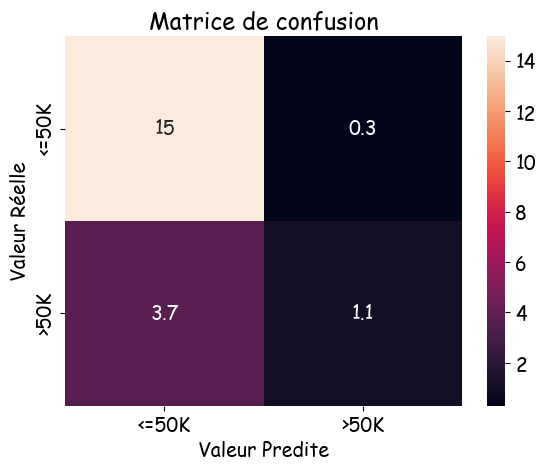

In [275]:
sns.heatmap(conf_matrix, annot=True, yticklabels=['<=50K', '>50K'], xticklabels=['<=50K', '>50K'])
plt.xlabel('Valeur Predite')
plt.ylabel('Valeur Réelle')
plt.title('Matrice de confusion')
plt.show()